In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('base_rf.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.loc[:,'y'] = df.y.replace('no',0).replace('yes',1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [4]:
X = df.drop('y',axis=1)
y = df.y

In [5]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3)

In [6]:
from sklearn.preprocessing import OrdinalEncoder

X_tr_o = X_tr.copy()
X_ts_o = X_ts.copy()

encoders = {}
for col,dtype in X_tr_o.dtypes.items():
    if dtype=='object':
        encoders[col] = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        X_tr_o.loc[:,col] = encoders[col].fit_transform(X_tr_o[[col]])
        X_ts_o.loc[:,col] = encoders[col].transform(X_ts_o[[col]])
    
X_tr_o

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12893,37,1.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,3,999,0,1.0,1.4,93.918,-42.7,4.962,5228.1
12897,28,7.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0,1,999,0,1.0,1.4,93.918,-42.7,4.962,5228.1
10484,36,7.0,1.0,3.0,1.0,0.0,0.0,1.0,4.0,3.0,2,999,0,1.0,1.4,94.465,-41.8,4.961,5228.1
13832,24,1.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,2,999,0,1.0,1.4,93.918,-42.7,4.963,5228.1
17609,30,0.0,1.0,7.0,0.0,0.0,0.0,0.0,3.0,1.0,6,999,0,1.0,1.4,93.918,-42.7,4.962,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,33,9.0,0.0,5.0,0.0,0.0,0.0,1.0,6.0,1.0,3,999,0,1.0,1.1,93.994,-36.4,4.858,5191.0
40414,72,3.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1,999,0,1.0,-1.7,94.027,-38.3,0.905,4991.6
24824,39,7.0,0.0,3.0,0.0,2.0,0.0,0.0,7.0,3.0,1,999,0,1.0,-0.1,93.200,-42.0,4.153,5195.8
2721,46,1.0,1.0,0.0,1.0,0.0,0.0,1.0,6.0,4.0,1,999,0,1.0,1.1,93.994,-36.4,4.859,5191.0


In [7]:
import xgboost
xgboost.__version__

'1.3.3'

In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3,5,7,9,11],
    'n_estimators':[50,100,150,200],
    'learning_rate': [0.05,0.1,0.2],
    'reg_alpha': [0,0.1,0.5],
    #'reg_lambda': [0,0.1,0.5],
}

xgb = GridSearchCV(
    XGBClassifier(n_estimators=500, random_state=61658, n_jobs=2,use_label_encoder=False,eval_metric='logloss'),
    params,
    cv=5,
    scoring='roc_auc',
    verbose=10,
)
xgb.fit(X_tr_o,y_tr)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 1/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   1.8s
[CV 2/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 2/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.9s
[CV 3/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 3/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.9s
[CV 4/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 4/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.9s
[CV 5/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 5/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.9s
[CV 1/5

[CV 4/5; 9/180] END learning_rate=0.05, max_depth=3, n_estimators=150, reg_alpha=0.5; total time=   2.8s
[CV 5/5; 9/180] START learning_rate=0.05, max_depth=3, n_estimators=150, reg_alpha=0.5
[CV 5/5; 9/180] END learning_rate=0.05, max_depth=3, n_estimators=150, reg_alpha=0.5; total time=   2.5s
[CV 1/5; 10/180] START learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0
[CV 1/5; 10/180] END learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0; total time=   3.8s
[CV 2/5; 10/180] START learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0
[CV 2/5; 10/180] END learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0; total time=   4.1s
[CV 3/5; 10/180] START learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0
[CV 3/5; 10/180] END learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0; total time=   4.1s
[CV 4/5; 10/180] START learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0
[CV 4/5; 10/180] END learning_rate=0.05, max_de

[CV 2/5; 18/180] END learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   3.2s
[CV 3/5; 18/180] START learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5
[CV 3/5; 18/180] END learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   4.5s
[CV 4/5; 18/180] START learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5
[CV 4/5; 18/180] END learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   4.1s
[CV 5/5; 18/180] START learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5
[CV 5/5; 18/180] END learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   3.4s
[CV 1/5; 19/180] START learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0
[CV 1/5; 19/180] END learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0; total time=   4.5s
[CV 2/5; 19/180] START learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0
[CV 2/5; 19/180] END learning_rate=0

[CV 5/5; 26/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.1; total time=   2.2s
[CV 1/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 1/5; 27/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   2.9s
[CV 2/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 2/5; 27/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   2.5s
[CV 3/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 3/5; 27/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   2.3s
[CV 4/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 4/5; 27/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   2.2s
[CV 5/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 5/5; 27/180] END learning_rate=0.05,

[CV 3/5; 35/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1; total time=  12.9s
[CV 4/5; 35/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1
[CV 4/5; 35/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1; total time=  11.6s
[CV 5/5; 35/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1
[CV 5/5; 35/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1; total time=   9.0s
[CV 1/5; 36/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 1/5; 36/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   7.8s
[CV 2/5; 36/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 2/5; 36/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   5.9s
[CV 3/5; 36/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 3/5; 36/180] END learning_

[CV 1/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   5.6s
[CV 2/5; 44/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1
[CV 2/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   4.8s
[CV 3/5; 44/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1
[CV 3/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   4.9s
[CV 4/5; 44/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1
[CV 4/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   5.2s
[CV 5/5; 44/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1
[CV 5/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   5.9s
[CV 1/5; 45/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 1/5; 45/180] END learning_

[CV 4/5; 52/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0; total time=   4.9s
[CV 5/5; 52/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0
[CV 5/5; 52/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0; total time=   9.6s
[CV 1/5; 53/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 1/5; 53/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   7.4s
[CV 2/5; 53/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 2/5; 53/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   6.5s
[CV 3/5; 53/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 3/5; 53/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   5.4s
[CV 4/5; 53/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 4/5; 53/180] END learn

[CV 2/5; 61/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.6s
[CV 3/5; 61/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0
[CV 3/5; 61/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.6s
[CV 4/5; 61/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0
[CV 4/5; 61/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.6s
[CV 5/5; 61/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0
[CV 5/5; 61/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.6s
[CV 1/5; 62/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 1/5; 62/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.6s
[CV 2/5; 62/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 2/5; 62/180] END learning_rate=0.1, max_depth=3, n_estimator

[CV 1/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   2.1s
[CV 2/5; 70/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0
[CV 2/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   2.1s
[CV 3/5; 70/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0
[CV 3/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   2.2s
[CV 4/5; 70/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0
[CV 4/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   2.0s
[CV 5/5; 70/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0
[CV 5/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   2.0s
[CV 1/5; 71/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 1/5; 71/180] END learning_rate=0.1, max_depth=3, n_est

[CV 5/5; 78/180] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   1.8s
[CV 1/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 1/5; 79/180] END learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0; total time=   2.7s
[CV 2/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 2/5; 79/180] END learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0; total time=   2.6s
[CV 3/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 3/5; 79/180] END learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0; total time=   2.6s
[CV 4/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 4/5; 79/180] END learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0; total time=   2.7s
[CV 5/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 5/5; 79/180] END learning_rate=0.1, max_depth=5, n_est

[CV 4/5; 87/180] END learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   1.7s
[CV 5/5; 87/180] START learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 5/5; 87/180] END learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   1.8s
[CV 1/5; 88/180] START learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0
[CV 1/5; 88/180] END learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0; total time=   3.3s
[CV 2/5; 88/180] START learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0
[CV 2/5; 88/180] END learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0; total time=   3.1s
[CV 3/5; 88/180] START learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0
[CV 3/5; 88/180] END learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0; total time=   3.8s
[CV 4/5; 88/180] START learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0
[CV 4/5; 88/180] END learning_rate=0.1, max_depth=7, n_es

[CV 2/5; 96/180] END learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   7.0s
[CV 3/5; 96/180] START learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 3/5; 96/180] END learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   6.9s
[CV 4/5; 96/180] START learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 4/5; 96/180] END learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   7.5s
[CV 5/5; 96/180] START learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 5/5; 96/180] END learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   7.5s
[CV 1/5; 97/180] START learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0
[CV 1/5; 97/180] END learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0; total time=   2.5s
[CV 2/5; 97/180] START learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0
[CV 2/5; 97/180] END learning_rate=0.1, max_depth

[CV 5/5; 104/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   7.1s
[CV 1/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 1/5; 105/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   7.0s
[CV 2/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 2/5; 105/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   7.7s
[CV 3/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 3/5; 105/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=  11.0s
[CV 4/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 4/5; 105/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   8.1s
[CV 5/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 5/5; 105/180] END learning

[CV 3/5; 113/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   6.4s
[CV 4/5; 113/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 4/5; 113/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   6.3s
[CV 5/5; 113/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 5/5; 113/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   5.9s
[CV 1/5; 114/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 1/5; 114/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   7.0s
[CV 2/5; 114/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 2/5; 114/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   5.9s
[CV 3/5; 114/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 3/5; 114/180] EN

[CV 1/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.8s
[CV 2/5; 122/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 2/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.8s
[CV 3/5; 122/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 3/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.8s
[CV 4/5; 122/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 4/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.8s
[CV 5/5; 122/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 5/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.8s
[CV 1/5; 123/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5
[CV 1/5; 123/180] END learning_rate=0.2,

[CV 4/5; 130/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0; total time=   3.6s
[CV 5/5; 130/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0
[CV 5/5; 130/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0; total time=   4.5s
[CV 1/5; 131/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 1/5; 131/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1; total time=   7.1s
[CV 2/5; 131/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 2/5; 131/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1; total time=   6.3s
[CV 3/5; 131/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 3/5; 131/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1; total time=   3.7s
[CV 4/5; 131/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 4/5; 131/180] END learning_rate=

[CV 2/5; 139/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0; total time=   3.6s
[CV 3/5; 139/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0
[CV 3/5; 139/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0; total time=   3.9s
[CV 4/5; 139/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0
[CV 4/5; 139/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0; total time=   3.6s
[CV 5/5; 139/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0
[CV 5/5; 139/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0; total time=   3.7s
[CV 1/5; 140/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0.1
[CV 1/5; 140/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0.1; total time=   4.8s
[CV 2/5; 140/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0.1
[CV 2/5; 140/180] END learning_rate=0.2, max

[CV 5/5; 147/180] END learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   1.9s
[CV 1/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 1/5; 148/180] END learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0; total time=   3.9s
[CV 2/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 2/5; 148/180] END learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0; total time=   3.6s
[CV 3/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 3/5; 148/180] END learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0; total time=   3.7s
[CV 4/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 4/5; 148/180] END learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0; total time=   4.0s
[CV 5/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 5/5; 148/180] END learning_rate=0.2, max_dept

[CV 3/5; 156/180] END learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=  10.3s
[CV 4/5; 156/180] START learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 4/5; 156/180] END learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   8.1s
[CV 5/5; 156/180] START learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 5/5; 156/180] END learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   7.8s
[CV 1/5; 157/180] START learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0
[CV 1/5; 157/180] END learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0; total time=   2.6s
[CV 2/5; 157/180] START learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0
[CV 2/5; 157/180] END learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0; total time=   2.5s
[CV 3/5; 157/180] START learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0
[CV 3/5; 157/180] END learning_rate=0.2, max_

[CV 1/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   8.0s
[CV 2/5; 165/180] START learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 2/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   9.0s
[CV 3/5; 165/180] START learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 3/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   7.4s
[CV 4/5; 165/180] START learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 4/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   6.9s
[CV 5/5; 165/180] START learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 5/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=  11.3s
[CV 1/5; 166/180] START learning_rate=0.2, max_depth=9, n_estimators=200, reg_alpha=0
[CV 1/5; 166/180] END learning_r

[CV 4/5; 173/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   6.3s
[CV 5/5; 173/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 5/5; 173/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   5.7s
[CV 1/5; 174/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 1/5; 174/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   6.7s
[CV 2/5; 174/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 2/5; 174/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   6.0s
[CV 3/5; 174/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 3/5; 174/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   6.3s
[CV 4/5; 174/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 4/5; 174/180] EN

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...s=2,
                                     num_parallel_tree=None, random_state=61658,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
               

In [9]:
xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'reg_alpha': 0.5}

In [10]:
from sklearn.metrics import roc_auc_score

preds = xgb.predict_proba(X_ts_o)[:,1]

roc_auc_score(y_ts,preds)

0.8086350468135437

In [11]:
xgb.best_estimator_.feature_importances_

array([0.00997945, 0.00721085, 0.00956173, 0.00817506, 0.03018398,
       0.00498423, 0.0075575 , 0.03398539, 0.02287415, 0.01399466,
       0.00935513, 0.05246229, 0.00774201, 0.07172732, 0.01144296,
       0.01392676, 0.04904315, 0.03032616, 0.6054672 ], dtype=float32)

In [12]:
imps = xgb.best_estimator_.feature_importances_
cols = X_tr_o.columns
order= np.argsort(imps)[::-1]

for col,imp in zip(cols[order],imps[order]):
    print(f'{col:30s} {imp:.2f}')

nr.employed                    0.61
poutcome                       0.07
pdays                          0.05
cons.conf.idx                  0.05
contact                        0.03
euribor3m                      0.03
default                        0.03
month                          0.02
day_of_week                    0.01
cons.price.idx                 0.01
emp.var.rate                   0.01
age                            0.01
marital                        0.01
campaign                       0.01
education                      0.01
previous                       0.01
loan                           0.01
job                            0.01
housing                        0.00


(array([1.43284621, 5.46903271, 3.00695894, 1.41266527, 0.78705637,
        0.82741823, 0.7466945 , 1.13013222, 0.94850383, 1.10995129,
        1.35212248, 1.04940849, 1.06958942, 1.15031315, 1.02922756,
        0.70633264, 0.48434238, 0.56506611, 0.6861517 , 0.54488518,
        0.40361865, 0.46416145, 0.44398051, 0.58524704, 0.62560891,
        0.52470424, 0.34307585, 0.08072373, 0.02018093]),
 array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
        0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
        0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
        0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
        0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
        0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
 <BarContainer object of 29 artists>)

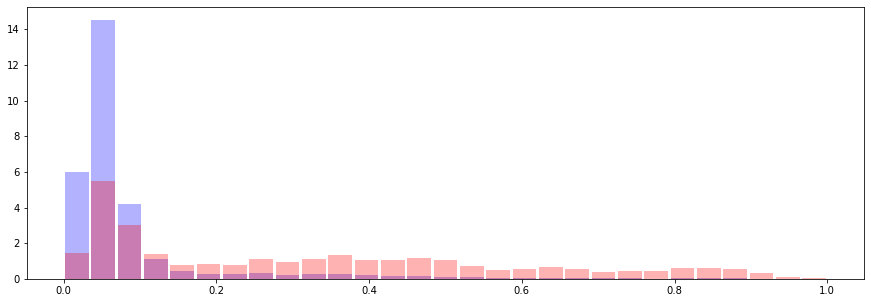

In [13]:
plt.figure(figsize=(15,5))
plt.hist(preds[y_ts==0], bins=np.linspace(0,1,30), density=True, color='b', alpha=.3, rwidth=.9)
plt.hist(preds[y_ts==1], bins=np.linspace(0,1,30), density=True, color='r', alpha=.3, rwidth=.9)

In [14]:
preds.min(),preds.max()

(0.004446197, 0.97231793)